<a href="https://colab.research.google.com/github/Bhavaniyannam/Wash-Trading-Case-Study-for-ERC20-Token-Group-5/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. Feature Engineering**

* Identify relevant columns for feature computation.
* Apply formulas to compute derived features (e.g., transaction rate = amount/time).
* Verify output values against expected calculations.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data here before calling data.info()

data = pd.read_excel('/content/trans.xlsx') # assuming data is in a file called trans.xlsx
# ... your code ...

# Check dataset info
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB
None


In [ ]:
# --- Temporal Feature Engineering ---
print("\n--- Temporal Feature Engineering ---")
data['DateTime'] = pd.to_datetime(data['DateTime (UTC)']) #Parse the Date-Time Column

data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year

# Display temporal feature summary
print(data[['Hour', 'DayOfWeek', 'Day', 'Month', 'Year']].describe())


--- Temporal Feature Engineering ---
               Hour     DayOfWeek           Day         Month     Year
count  19836.000000  19836.000000  19836.000000  19836.000000  19836.0
mean      11.954073      2.943839     15.549808      4.092257   2024.0
std        7.159401      2.016662      8.426810      1.472873      0.0
min        0.000000      0.000000      1.000000      1.000000   2024.0
25%        5.000000      1.000000      8.000000      3.000000   2024.0
50%       13.000000      3.000000     16.000000      4.000000   2024.0
75%       18.000000      5.000000     23.000000      5.000000   2024.0
max       23.000000      6.000000     31.000000      6.000000   2024.0


In [ ]:
hourly_transactions = data.groupby('Hour')['Quantity'].sum().reset_index()
weekly_transactions = data.groupby('DayOfWeek')['Quantity'].sum().reset_index()
print(hourly_transactions)
print(weekly_transactions)

    Hour      Quantity
0      0  2.128726e+05
1      1  6.126710e+05
2      2  2.117816e+05
3      3  2.238309e+05
4      4  1.702633e+05
5      5  1.808980e+05
6      6  1.707133e+05
7      7  2.127001e+05
8      8  1.868557e+05
9      9  1.756569e+05
10    10  1.521558e+05
11    11  1.365022e+05
12    12  2.267365e+05
13    13  1.609966e+05
14    14  5.232624e+05
15    15  1.835619e+06
16    16  4.772524e+05
17    17  2.372067e+05
18    18  1.948946e+05
19    19  2.406130e+05
20    20  2.678636e+05
21    21  1.827231e+05
22    22  3.026431e+05
23    23  2.001926e+05
   DayOfWeek      Quantity
0          0  1.027714e+06
1          1  1.296783e+06
2          2  2.205443e+06
3          3  7.281243e+05
4          4  7.003581e+05
5          5  6.162782e+05
6          6  9.222044e+05


<ipython-input-6-7c9e3a8cacb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='viridis')


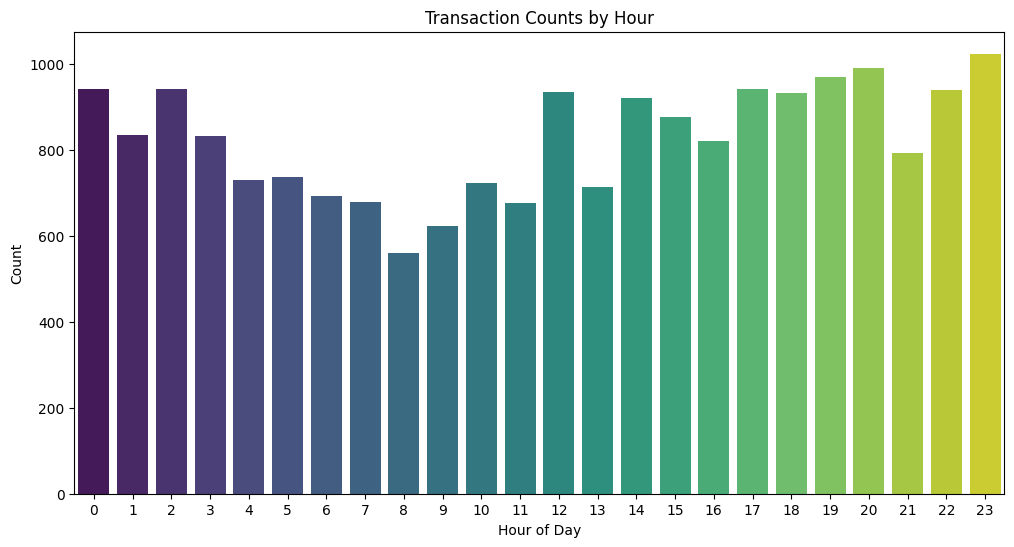

In [ ]:
# Bar plot of transaction counts by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Transaction Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

<ipython-input-7-64547e76890a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sender_tx_counts['SenderTxCount'], palette='Blues')


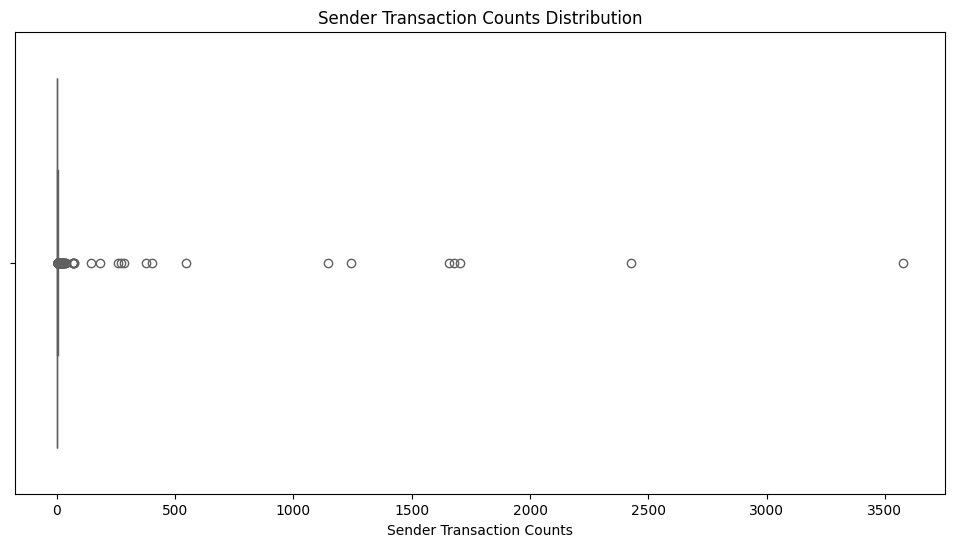

In [ ]:

# Assuming `data` is the original DataFrame
sender_tx_counts = data['From'].value_counts().reset_index()
sender_tx_counts.columns = ['Sender', 'SenderTxCount']

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=sender_tx_counts['SenderTxCount'], palette='Blues')
plt.title('Sender Transaction Counts Distribution')
plt.xlabel('Sender Transaction Counts')
plt.show()


<ipython-input-8-36181262b606>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=receiver_tx_count['ReceiverTxCount'], palette='Blues')


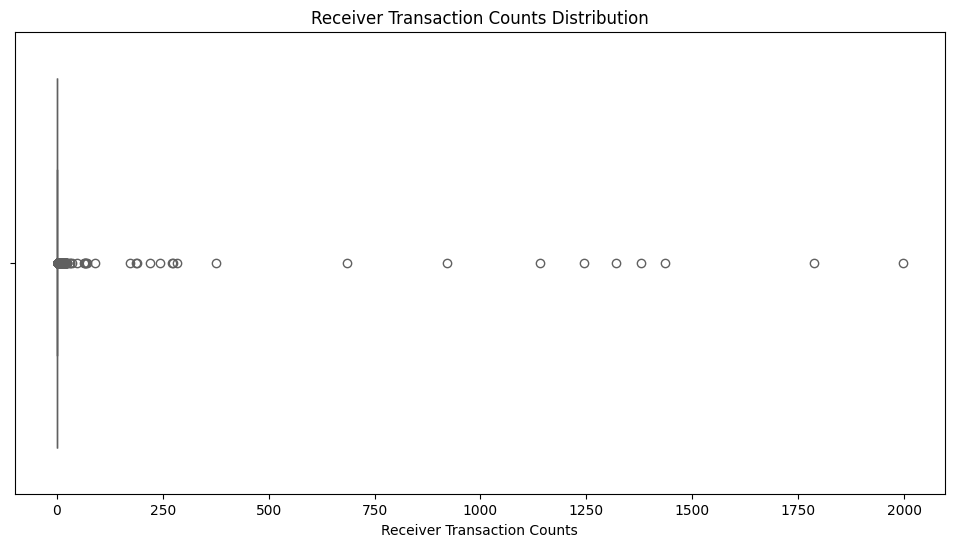

In [ ]:
receiver_tx_count = data['To'].value_counts().reset_index()
receiver_tx_count.columns = ['Receiver', 'ReceiverTxCount']
# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=receiver_tx_count['ReceiverTxCount'], palette='Blues')
plt.title('Receiver Transaction Counts Distribution')
plt.xlabel('Receiver Transaction Counts')
plt.show()

In [ ]:

# --- Save the processed dataset ---
processed_file_path = '/content/processed_NEAR_token_transaction_data.xlsx'
data.to_excel(processed_file_path, index=False)
print(f"Processed dataset saved to: {processed_file_path}")

Processed dataset saved to: /content/processed_NEAR_token_transaction_data.xlsx





**Network analysis**

* Dataset Representation
* Graph Construction
* Centrality Calculations
* Feature Extraction



In [ ]:
import pandas as pd
import networkx as nx

# Load the dataset
file_path = '/content/trans.xlsx'
data = pd.read_excel(file_path)

# Create an edge list
edge_list = data[['From', 'To', 'Quantity']].copy()
edge_list.columns = ['source', 'target', 'weight']


In [ ]:

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in edge_list.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])


In [ ]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')


In [ ]:
# Create a DataFrame with node features
nodes = list(G.nodes())
features_df = pd.DataFrame({
    'node': nodes,
    'degree_centrality': [degree_centrality[node] for node in nodes],
    'closeness_centrality': [closeness_centrality.get(node, 0) for node in nodes],
    'betweenness_centrality': [betweenness_centrality.get(node, 0) for node in nodes]
})

# Display the resulting DataFrame
print(features_df.head())


                                         node  degree_centrality  \
0  0x6469b34a2a4723163c4902dbbdea728d20693c12           0.302418   
1  0x776a0725094cbf984e31b43d17e8aaec3c88294a           0.000284   
2  0x983dfba1c0724786598af0e63a9a6f94aabd24a1           0.034708   
3  0x22f9dcf4647084d6c31b2765f6910cd85c178c18           0.235562   
4  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0           0.000853   

   closeness_centrality  betweenness_centrality  
0              0.234901                0.373287  
1              0.154740                0.000000  
2              0.212838                0.019162  
3              0.209364                0.168209  
4              0.144766                0.000386  


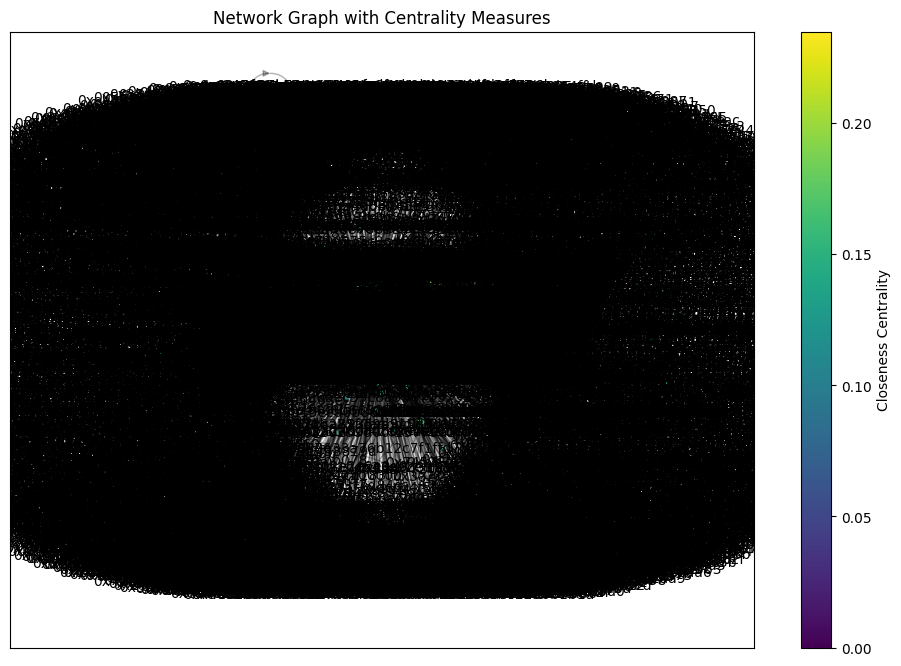

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/trans.xlsx'
data = pd.read_excel(file_path)

# Create an edge list
edge_list = data[['From', 'To', 'Quantity']].copy()
edge_list.columns = ['source', 'target', 'weight']

# Create a directed graph
G = nx.DiGraph()  # Make sure G is defined within this cell

# Add edges to the graph
for _, row in edge_list.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Draw the graph with centrality measures as node size
plt.figure(figsize=(12, 8))

# Define node sizes based on degree centrality (scaled for better visualization)
node_sizes = [5000 * degree_centrality[node] for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)  # Spring layout for better visualization

# Get the current axes
ax = plt.gca()  # Get current axes

nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)  # Pass ax to draw functions
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=list(closeness_centrality.values()),
    cmap=plt.cm.viridis,
    alpha=0.9,
    ax=ax  # Pass ax to draw functions
)
nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)  # Pass ax to draw functions

# Add a color bar for closeness centrality
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,
                           norm=plt.Normalize(vmin=min(closeness_centrality.values()),
                                              vmax=max(closeness_centrality.values())))
sm.set_array([])
plt.colorbar(sm, label='Closeness Centrality', ax=ax)  # Specify ax for colorbar

# Add title
plt.title("Network Graph with Centrality Measures")
plt.show()